In [42]:
import numpy as np
import matplotlib.pyplot as plt

rnd = np.random.RandomState(seed=42)

side = 10
scatter_radius = 4
particle_radius = 2
speed = 1.0
num_walls = 5
hole = 3

max_steps = 1000
abs_tol = 1e-5
rel_tol = 0.01

x_range = side - particle_radius
y_range = side - particle_radius
scatter_range = scatter_radius + particle_radius
hole_range = hole - particle_radius

params = np.array([side, scatter_radius, particle_radius, speed, x_range-scatter_range, y_range-scatter_range])
if np.any(params <= abs_tol):
    print(params)
    raise Exception('Parameters must all be positive')
if hole <= particle_radius:
    print('Hole is too small for particle to escape')
    
normals = [np.array([1,0])
           ,np.array([-1,0])
           ,np.array([0,1])
           ,np.array([0,-1])
          ]

def solve_quadratic(a, b, c):
    d = b**2 - 4*a*c
    if d > abs_tol:
        e = np.sqrt(d)
        small = (-b - e) / (2*a)
        big   = (-b + e) / (2*a)
        if b > 0:
            small, big = big, small
    else:
        small, big = np.inf, np.inf
    return small, big

def run_trial(pos=None, theta = None):
    t = 0.0
    if pos is None:
        r = 0    
        while r < (1+rel_tol) * scatter_range:
            x = rnd.uniform(low=-(1-rel_tol)*x_range, high=(1-rel_tol)*x_range)    
            y = rnd.uniform(low=-(1-rel_tol)*y_range, high=(1-rel_tol)*y_range)
            pos = np.array([x,y])
            r = np.sqrt(pos.dot(pos))
    else:
        if not((abs(pos[0]) < x_range) & (abs(pos[1]) < y_range) & pos.dot(pos) > scatter_range):
            raise Exception('illegal initial position {}'.format(pos))
            
    if theta is None:
        theta = rnd.uniform(low=0, high=2*np.pi)
    vel = speed * np.array([np.cos(theta), np.sin(theta)])

    t_hist = [t]
    pos_hist = [pos.copy()]
    vel_hist = [vel.copy()]

    dts = np.zeros(num_walls)
    prior_collision = num_walls
    for step in range(max_steps):
        dts[:] = np.inf

        if abs(vel[0]) > abs_tol:
            dts[0] = (-x_range - pos[0]) / vel[0]
            dts[1] = ( x_range - pos[0]) / vel[0]

        if abs(vel[1]) > abs_tol:
            dts[2] = (-y_range - pos[1]) / vel[1]
            dts[3] = ( y_range - pos[1]) / vel[1]
        if prior_collision in range(0,4):
            dts[prior_collision] = np.inf

        a = vel.dot(vel)
        if a  > abs_tol:
            b = 2 * pos.dot(vel)
            c = pos.dot(pos) - scatter_range**2
            small, big = solve_quadratic(a, b, c)
            if prior_collision == 4:
                dts[4] = big
            else:
                dts[4] = small

        dts[dts<abs_tol] = np.inf
        col_wall = np.argmin(dts)
        dt = dts[col_wall]
        t += dt
        pos += vel*dt

        if col_wall in range(0,4):
            n = normals[col_wall]
        elif col_wall == 4:
            n = pos.copy()
            l = np.sqrt(n.dot(n))
            n /= l

        vel -= 2 * (vel.dot(n)) * n

        pos_hist.append(pos.copy())
        vel_hist.append(vel.copy())
        t_hist.append(t)

        if col_wall == 2:
            if abs(pos[0]) < hole_range:
#                 print('Escaped after {} collisions'.format(step+1))
                break

    t_hist = np.array(t_hist)
    pos_hist = np.array(pos_hist)
    vel_hist = np.array(vel_hist)
    num_col = len(t_hist) - 1
    return num_col, t_hist, pos_hist, vel_hist

num_cols = []
for t in range(trials):
    nc, t_hist, pos_hist, vel_hist = run_trial()
    num_cols.append(nc)
# print(pos)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rnd = np.random.RandomState(seed=42)

side = 10
scatter_radius = 4
particle_radius = 2
speed = 1.0
num_walls = 5
hole = 3

max_steps = 1000
abs_tol = 1e-5
rel_tol = 0.01

x_range = side - particle_radius
y_range = side - particle_radius
scatter_range = scatter_radius + particle_radius
hole_range = hole - particle_radius

params = np.array([side, scatter_radius, particle_radius, speed, x_range-scatter_range, y_range-scatter_range])
if np.any(params <= abs_tol):
    print(params)
    raise Exception('Parameters must all be positive')
if hole <= particle_radius:
    print('Hole is too small for particle to escape')
    
normals = [np.array([1,0])
           ,np.array([-1,0])
           ,np.array([0,1])
           ,np.array([0,-1])
          ]

def solve_quadratic(a, b, c):
    d = b**2 - 4*a*c
    if d > abs_tol:
        e = np.sqrt(d)
        small = (-b - e) / (2*a)
        big   = (-b + e) / (2*a)
        if b > 0:
            small, big = big, small
    else:
        small, big = np.inf, np.inf
    return small, big

# def run_trial():
t = 0.0
escapes = 0
r = 0

x = rnd.uniform(low=-hole_range, high=hole_range)    
y = -y_range
pos = np.array([x,y])
theta = rnd.uniform(low=0, high=np.pi)
vel = speed * np.array([np.cos(theta), np.sin(theta)])

t_hist = [t]
escape_hist = [0]
pos_hist = [pos.copy()]
vel_hist = [vel.copy()]


while escapes < 1000:
    dts = np.zeros(num_walls)
    prior_collision = num_walls
    for step in range(max_steps):
        dts[:] = np.inf

        if abs(vel[0]) > abs_tol:
            dts[0] = (-x_range - pos[0]) / vel[0]
            dts[1] = ( x_range - pos[0]) / vel[0]

        if abs(vel[1]) > abs_tol:
            dts[2] = (-y_range - pos[1]) / vel[1]
            dts[3] = ( y_range - pos[1]) / vel[1]
        if prior_collision in range(0,4):
            dts[prior_collision] = np.inf

        a = vel.dot(vel)
        if a  > abs_tol:
            b = 2 * pos.dot(vel)
            c = pos.dot(pos) - scatter_range**2
            small, big = solve_quadratic(a, b, c)
            if prior_collision == 4:
                dts[4] = big
            else:
                dts[4] = small

        dts[dts<abs_tol] = np.inf
        col_wall = np.argmin(dts)
        dt = dts[col_wall]
        t += dt
        pos += vel*dt

        if col_wall in range(0,4):
            n = normals[col_wall]
        elif col_wall == 4:
            n = pos.copy()
            l = np.sqrt(n.dot(n))
            n /= l

        vel -= 2 * (vel.dot(n)) * n

        if col_wall == 2:
            if abs(pos[0]) < hole_range:
                escapes += 1

        pos_hist.append(pos.copy())
        vel_hist.append(vel.copy())
        t_hist.append(t)
        escape_hist.append(escapes)


t_hist = np.array(t_hist)
pos_hist = np.array(pos_hist)
vel_hist = np.array(vel_hist)
escape_hist = np.array(escape_hist)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rnd = np.random.RandomState(seed=42)

side = 10
scatter_radius = 4
particle_radius = 2
speed = 1.0
num_walls = 5
hole = 3

max_steps = 1000
trials = 100
abs_tol = 1e-5
rel_tol = 0.01

x_range = side - particle_radius
y_range = side - particle_radius
scatter_range = scatter_radius + particle_radius
hole_range = hole - particle_radius

params = np.array([side, scatter_radius, particle_radius, speed, x_range-scatter_range, y_range-scatter_range])
if np.any(params <= abs_tol):
    print(params)
    raise Exception('Parameters must all be positive')
if hole <= particle_radius:
    print('Hole is too small for particle to escape')
    
normals = [np.array([1,0])
           ,np.array([-1,0])
           ,np.array([0,1])
           ,np.array([0,-1])
          ]

def solve_quadratic(a, b, c):
    d = b**2 - 4*a*c
    if d > abs_tol:
        e = np.sqrt(d)
        small = (-b - e) / (2*a)
        big   = (-b + e) / (2*a)
        if b > 0:
            small, big = big, small
    else:
        small, big = np.inf, np.inf
    return small, big

# def run_trial():
t = 0.0
escapes = 0
r = 0

x = rnd.uniform(low=-hole_range, high=hole_range)    
y = -y_range
pos = np.array([x,y])
theta = rnd.uniform(low=0, high=np.pi)
vel = speed * np.array([np.cos(theta), np.sin(theta)])

t_hist = [t]
escape_hist = [0]
pos_hist = [pos.copy()]
vel_hist = [vel.copy()]


while escapes < 1000:
    dts = np.zeros(num_walls)
    prior_collision = num_walls
    for step in range(max_steps):
        dts[:] = np.inf

        if abs(vel[0]) > abs_tol:
            dts[0] = (-x_range - pos[0]) / vel[0]
            dts[1] = ( x_range - pos[0]) / vel[0]

        if abs(vel[1]) > abs_tol:
            dts[2] = (-y_range - pos[1]) / vel[1]
            dts[3] = ( y_range - pos[1]) / vel[1]
        if prior_collision in range(0,4):
            dts[prior_collision] = np.inf

        a = vel.dot(vel)
        if a  > abs_tol:
            b = 2 * pos.dot(vel)
            c = pos.dot(pos) - scatter_range**2
            small, big = solve_quadratic(a, b, c)
            if prior_collision == 4:
                dts[4] = big
            else:
                dts[4] = small

        dts[dts<abs_tol] = np.inf
        col_wall = np.argmin(dts)
        dt = dts[col_wall]
        t += dt
        pos += vel*dt

        if col_wall in range(0,4):
            n = normals[col_wall]
        elif col_wall == 4:
            n = pos.copy()
            l = np.sqrt(n.dot(n))
            n /= l

        vel -= 2 * (vel.dot(n)) * n

        if col_wall == 2:
            if abs(pos[0]) < hole_range:
                escapes += 1

        pos_hist.append(pos.copy())
        vel_hist.append(vel.copy())
        t_hist.append(t)
        escape_hist.append(escapes)


t_hist = np.array(t_hist)
pos_hist = np.array(pos_hist)
vel_hist = np.array(vel_hist)
escape_hist = np.array(escape_hist)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


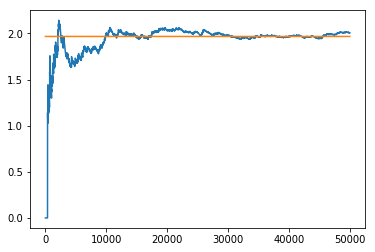

In [16]:
q = np.arange(len(escape_hist))
ce_ratio = escape_hist / q * 100

bdy_length = 2*2*x_range + 2*2*y_range + 2*np.pi*scatter_range
hole_length = 2*hole_range
hb_ratio = hole_length / bdy_length * 100


# print(num_col / escape_hist[-1])
# print(pos)
# plt
ce_ratio
plt.plot(q,ce_ratio)
plt.plot(q,np.ones_like(q) * hb_ratio)
plt.show()


In [6]:
import ipywidgets as widgets

h = hole_range
x = x_range
y = y_range

side_bdy = np.array([(h,-y), (x,-y), (x,y), (-x,y), (-x,-y), (-h,-y)])
thetas = np.linspace(0, 2*np.pi, 100)
scatter_bdy = scatter_range * np.array([np.cos(thetas), np.sin(thetas)]).T

dpos = np.diff(pos_hist,axis=0)
def draw(steps=1):
    e = escape_hist[steps]
    if e == 0:
        se_ratio = np.inf
    else:
        se_ratio = steps / e
    print('boundary/hole = {}, collisions/escapes = {}'.format(bh_ratio, se_ratio))
    fig, ax = plt.subplots(figsize=[5,5])
    ax.plot(side_bdy[:,0], side_bdy[:,1])
    ax.fill(scatter_bdy[:,0], scatter_bdy[:,1])
    ax.quiver(pos_hist[:steps,0], pos_hist[:steps,1], dpos[:steps,0], dpos[:steps,1], angles='xy', scale_units='xy', scale=1)
    ax.set_aspect('equal')
    plt.show()
    
max_steps = pos_hist.shape[0]-1
widgets.interact(draw,steps=(1,max_steps));

A Jupyter Widget

In [7]:
bdy_length = 2*2*x_range + 2*2*y_range + 2*np.pi*scatter_range
hole_length = 2*hole_range
print(bdy_length/hole_length)
print(num_col/escapes)
# num_cols = np.array(num_cols)
# print(num_cols.mean())

50.84955592153876
49.85044865403788


In [42]:
import numpy as np
import matplotlib.pyplot as plt

rnd = np.random.RandomState(seed=42)

side = 10
scatter_radius = 4
particle_radius = 2
speed = 1.0
num_walls = 5
hole = 3

max_steps = 1000
trials = 1000
abs_tol = 1e-5
rel_tol = 0.01

x_range = side - particle_radius
y_range = side - particle_radius
scatter_range = scatter_radius + particle_radius
hole_range = hole - particle_radius

params = np.array([side, scatter_radius, particle_radius, speed, x_range-scatter_range, y_range-scatter_range])
if np.any(params <= abs_tol):
    print(params)
    raise Exception('Parameters must all be positive')
if hole <= particle_radius:
    print('Hole is too small for particle to escape')
    
normals = [np.array([1,0])
           ,np.array([-1,0])
           ,np.array([0,1])
           ,np.array([0,-1])
          ]

def solve_quadratic(a, b, c):
    d = b**2 - 4*a*c
    if d > abs_tol:
        e = np.sqrt(d)
        small = (-b - e) / (2*a)
        big   = (-b + e) / (2*a)
        if b > 0:
            small, big = big, small
    else:
        small, big = np.inf, np.inf
    return small, big

def run_trial():
    t = 0.0
    r = 0
    while r < (1+rel_tol) * scatter_range:
        x = rnd.uniform(low=-(1-rel_tol)*x_range, high=(1-rel_tol)*x_range)    
        y = rnd.uniform(low=-(1-rel_tol)*y_range, high=(1-rel_tol)*y_range)
        pos = np.array([x,y])
        r = np.sqrt(pos.dot(pos))
    theta = rnd.uniform(low=0, high=2*np.pi)
    vel = speed * np.array([np.cos(theta), np.sin(theta)])

    t_hist = [t]
    pos_hist = [pos.copy()]
    vel_hist = [vel.copy()]

    dts = np.zeros(num_walls)
    prior_collision = num_walls
    for step in range(max_steps):
        dts[:] = np.inf

        if abs(vel[0]) > abs_tol:
            dts[0] = (-x_range - pos[0]) / vel[0]
            dts[1] = ( x_range - pos[0]) / vel[0]

        if abs(vel[1]) > abs_tol:
            dts[2] = (-y_range - pos[1]) / vel[1]
            dts[3] = ( y_range - pos[1]) / vel[1]
        if prior_collision in range(0,4):
            dts[prior_collision] = np.inf

        a = vel.dot(vel)
        if a  > abs_tol:
            b = 2 * pos.dot(vel)
            c = pos.dot(pos) - scatter_range**2
            small, big = solve_quadratic(a, b, c)
            if prior_collision == 4:
                dts[4] = big
            else:
                dts[4] = small

        dts[dts<abs_tol] = np.inf
        col_wall = np.argmin(dts)
        dt = dts[col_wall]
        t += dt
        pos += vel*dt

        if col_wall in range(0,4):
            n = normals[col_wall]
        elif col_wall == 4:
            n = pos.copy()
            l = np.sqrt(n.dot(n))
            n /= l

        vel -= 2 * (vel.dot(n)) * n

        pos_hist.append(pos.copy())
        vel_hist.append(vel.copy())
        t_hist.append(t)

        if col_wall == 2:
            if abs(pos[0]) < hole_range:
#                 print('Escaped after {} collisions'.format(step+1))
                break

    t_hist = np.array(t_hist)
    pos_hist = np.array(pos_hist)
    vel_hist = np.array(vel_hist)
    num_col = len(t_hist) - 1
    return num_col, t_hist, pos_hist, vel_hist

num_cols = []
for t in range(trials):
    nc, t_hist, pos_hist, vel_hist = run_trial()
    num_cols.append(nc)
# print(pos)

In [43]:
bdy_length = 2*2*x_range + 2*2*y_range + 2*np.pi*scatter_range
hole_length = 2*hole_range
print(bdy_length/hole_length)
num_cols = np.array(num_cols)
print(num_cols.mean())

50.84955592153876
61.939


In [33]:
8*y_range+2*np.pi*scatter_range
bdy_length
# hole_range

107.9822971502571

In [20]:
import ipywidgets as widgets
h = hole_range
x = x_range
y = y_range
side_bdy = np.array([(h,-y), (x,-y), (x,y), (-x,y), (-x,-y), (-h,-y)])
thetas = np.linspace(0, 2*np.pi, 100)
scatter_bdy = scatter_range * np.array([np.cos(thetas), np.sin(thetas)]).T

dpos = np.diff(pos_hist,axis=0)
def draw(steps=1):
    fig, ax = plt.subplots(figsize=[5,5])
    ax.plot(side_bdy[:,0], side_bdy[:,1])
    ax.fill(scatter_bdy[:,0], scatter_bdy[:,1])
    ax.quiver(pos_hist[:steps,0], pos_hist[:steps,1], dpos[:steps,0], dpos[:steps,1], angles='xy', scale_units='xy', scale=1)
    ax.set_aspect('equal')
    plt.show()
    
widgets.interact(draw,steps=(1,pos_hist.shape[0]-1));

A Jupyter Widget

In [6]:
import ipywidgets as widgets
side_bdy = np.array([(hole,-side), (side,-side), (side,side), (-side,side)
                     ,(-side,-side), (-hole,-side)])
thetas = np.linspace(0, 2*np.pi, 100)
scatter_bdy = scatter_radius * np.array([np.cos(thetas), np.sin(thetas)]).T


dpos = np.diff(pos_hist,axis=0)
def draw(steps=1):
    plt.plot(side_bdy[:,0], side_bdy[:,1])
    plt.plot(scatter_bdy[:,0], scatter_bdy[:,1])
    plt.quiver(pos_hist[:steps,0], pos_hist[:steps,1], dpos[:steps,0], dpos[:steps,1], angles='xy', scale_units='xy', scale=1)
    plt.show()
widgets.interact(draw,steps=(1,num_col-1))

A Jupyter Widget

<function __main__.draw>

In [8]:
import ipywidgets as widgets
pos_hist = np.array(pos_hist)
vel_hist = np.array(vel_hist)

def draw(steps):
    plt.plot([hole,side,side,-side,-side,-hole],
             [-side,-side,side,side,-side,-side])
    plt.plot(pos_hist[:steps,0], pos_hist[:steps,1])
    plt.show()
widgets.interact(draw,steps=(0,10))

A Jupyter Widget

<function __main__.draw>

In [21]:
step=1
dpos[:step]

array([[ -1.93515494, -17.03172894]])

In [14]:
dpos.shape

(106, 2)

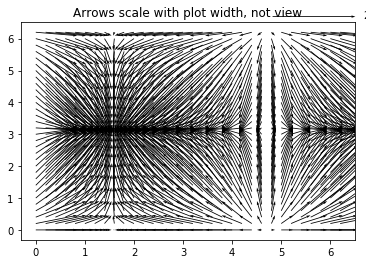

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma

X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = 1*np.cos(X)
V = np.sin(Y)

plt.figure()
plt.title('Arrows scale with plot width, not view')
Q = plt.quiver(X, Y, U, V, units='xy', scale=1.0)
qk = plt.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                   coordinates='figure')
plt.show()

In [65]:
print(pos_hist[:2,:])
print(dpos[:1,:])

[[-2.23569508  8.03172894]
 [-4.17085002 -9.        ]]
[[ -1.93515494 -17.03172894]]


In [80]:
scatter_bdy

array([[  2.00000000e+00,   1.99597335e+00,   1.98390963e+00,
          1.96385739e+00,   1.93589740e+00,   1.90014224e+00,
          1.85673587e+00,   1.80585308e+00,   1.74769875e+00,
          1.68250707e+00,   1.61054052e+00,   1.53208889e+00,
          1.44746808e+00,   1.35701882e+00,   1.26110533e+00,
          1.16011382e+00,   1.05445094e+00,   9.44542150e-01,
          8.30830026e-01,   7.13772443e-01,   5.93840751e-01,
          4.71517871e-01,   3.47296355e-01,   2.21676400e-01,
          9.51638316e-02,  -3.17319277e-02,  -1.58499914e-01,
         -2.84629677e-01,  -4.09613336e-01,  -5.32947627e-01,
         -6.54135927e-01,  -7.72690251e-01,  -8.88133225e-01,
         -1.00000000e+00,  -1.10784013e+00,  -1.21121937e+00,
         -1.30972147e+00,  -1.40294978e+00,  -1.49052890e+00,
         -1.57210619e+00,  -1.64735316e+00,  -1.71596683e+00,
         -1.77767090e+00,  -1.83221691e+00,  -1.87938524e+00,
         -1.91898595e+00,  -1.95085957e+00,  -1.97487778e+00,
        

In [7]:
for w in walls:
    dx = pos - w['base_point']    
    dist_normal = dx.dot(w['normal'])
    vel_normal = vel.dot(w['normal'])
    t = (particle_radius - dist_normal) / vel_normal
    print(vel)
    print(t)


frame = side_half_length * np.eye(2)
walls = []
for d in range(dim):
    for side in [-1,1]:
        new_wall = {'frame': frame.copy()}

        new_wall['base_point'] = -1*frame[0].copy()
        
        normal = frame[0].copy()        
        length = np.sqrt(normal.dot(normal))
        normal /= length        
        new_wall['normal'] = normal
        
        walls.append(new_wall)
        frame[0] *= -1
    frame = np.roll(frame, -1, axis=0)

for w in walls:
    print('base point')
    print(w['base_point'])
    print('frame')
    print(w['frame'])
    print('unit normal')
    print(w['normal'])
    print()

base point
[-10.  -0.]
frame
[[ 10.   0.]
 [  0.  10.]]
unit normal
[ 1.  0.]

base point
[ 10.   0.]
frame
[[-10.  -0.]
 [  0.  10.]]
unit normal
[-1. -0.]

base point
[ -0. -10.]
frame
[[  0.  10.]
 [ 10.   0.]]
unit normal
[ 0.  1.]

base point
[  0.  10.]
frame
[[ -0. -10.]
 [ 10.   0.]]
unit normal
[-0. -1.]

[ 0.  0.]
[-2.03245007  7.30157176]
[ 3.75830186  1.59826744]
[-5.57249802 -5.57288877]
[-7.15904548  5.93205356]
[-0.80487925 -0.59343861]
2.28724309816
[-0.80487925 -0.59343861]
-20.0763597959
[-0.80487925 -0.59343861]
25.1619177324
[-0.80487925 -0.59343861]
-5.1697789305


In [7]:
import numpy as np
rnd = np.random.RandomState(seed=42)

dim = 2
side_half_length = 10
scatter_radius = 7
particle_radius = 1
speed = 1.0

frame = side_half_length * np.eye(2)
walls = []
for d in range(dim):
    for side in [-1,1]:
        new_wall = {'frame': frame.copy()}

        new_wall['base_point'] = -1*frame[0].copy()
        
        normal = frame[0].copy()        
        length = np.sqrt(normal.dot(normal))
        normal /= length        
        new_wall['normal'] = normal
        
        walls.append(new_wall)
        frame[0] *= -1
    frame = np.roll(frame, -1, axis=0)

for w in walls:
    print('base point')
    print(w['base_point'])
    print('frame')
    print(w['frame'])
    print('unit normal')
    print(w['normal'])
    print()

pos = np.array([0.,0.])
while pos.dot(pos) < 1.1 * (scatter_radius + particle_radius)**2:
    print(pos)
    x_range = 0.9 * (side_half_length - particle_radius)
    y_range = 0.9 * (side_half_length - particle_radius)
    x = rnd.uniform(low=-1*x_range, high=x_range)    
    y = rnd.uniform(low=-1*y_range, high=y_range)
    pos = np.array([x,y])
print(pos)

theta = rnd.uniform(low=0, high=2*np.pi)
vel = speed * np.array([np.cos(theta), np.sin(theta)])

for w in walls:
    dx = pos - w['base_point']    
    dist_normal = dx.dot(w['normal'])
    vel_normal = vel.dot(w['normal'])
    t = (particle_radius - dist_normal) / vel_normal
    print(vel)
    print(t)

base point
[-10.  -0.]
frame
[[ 10.   0.]
 [  0.  10.]]
unit normal
[ 1.  0.]

base point
[ 10.   0.]
frame
[[-10.  -0.]
 [  0.  10.]]
unit normal
[-1. -0.]

base point
[ -0. -10.]
frame
[[  0.  10.]
 [ 10.   0.]]
unit normal
[ 0.  1.]

base point
[  0.  10.]
frame
[[ -0. -10.]
 [ 10.   0.]]
unit normal
[-0. -1.]

[ 0.  0.]
[-2.03245007  7.30157176]
[ 3.75830186  1.59826744]
[-5.57249802 -5.57288877]
[-7.15904548  5.93205356]
[-0.80487925 -0.59343861]
2.28724309816
[-0.80487925 -0.59343861]
-20.0763597959
[-0.80487925 -0.59343861]
25.1619177324
[-0.80487925 -0.59343861]
-5.1697789305


In [4]:
import numpy as np



In [44]:
# from pprint import pprint# as print
from IPython.display import display, Image
import pandas as pd
import pprint
display(pd.DataFrame(walls[0]['frame']) )

,0,1
0,1.0,0.0
1,0.0,1.0


In [ ]:
pos = rnd.rand

In [ ]:
    pos = rnd.rand